In [1]:
from netCDF4 import Dataset
import netCDF4
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import xarray as xr
from datetime import datetime, timezone
import nc_time_axis

atmos_epoch = datetime(1900, 1, 1, 0, 0, tzinfo=timezone.utc)

In [2]:
observational_geopotential = Dataset('../data/geopotential_height_500hPa_era5_6hourly_z0001_daymean_2019_beginAdjust.nc', mode='r')
observational_final = Dataset('../data/geopotential_height_500hPa_era5_6hourly_z0001_daymean_final.nc', mode='r')
xr_observational_final = xr.open_dataset(xr.backends.NetCDF4DataStore(observational_final), decode_times=True)
observational_labels = Dataset('../data/labels/GTD_1979-2019_JJAextd_8.nc', mode='r')

In [3]:
long = observational_geopotential.variables['longitude']
lat = observational_geopotential.variables['latitude']
zg = observational_geopotential.variables['z_0001']
zg_final = observational_final.variables['z_0001']
time_final_raw = observational_final.variables["time"]
time_raw = observational_geopotential.variables["time"]
time = netCDF4.num2date(time_raw[:], time_raw.units, time_raw.calendar)
time_final = netCDF4.num2date(time_final_raw[:], time_final_raw.units, time_final_raw.calendar)

/hkfs/home/haicore/scc/mw8007/blocking/.venv/lib64/python3.9/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


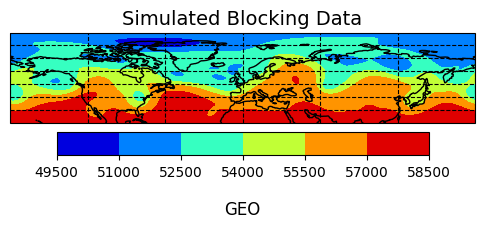

In [4]:
# plot observational data onto worldmap

fig = plt.figure(figsize=(6, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-180, 180, 20, 90], crs=ccrs.PlateCarree())
ax.coastlines(resolution="110m",linewidth=1)
ax.gridlines(linestyle='--',color='black')

plt.contourf(long[:], lat[:], zg[0], transform=ccrs.PlateCarree(),cmap=plt.cm.jet)
plt.title('Simulated Blocking Data', size=14)
cb = plt.colorbar(ax=ax, orientation="horizontal", pad=0.02, aspect=16, shrink=0.8)
cb.set_label('GEO',size=12,rotation=0,labelpad=15)
cb.ax.tick_params(labelsize=10)

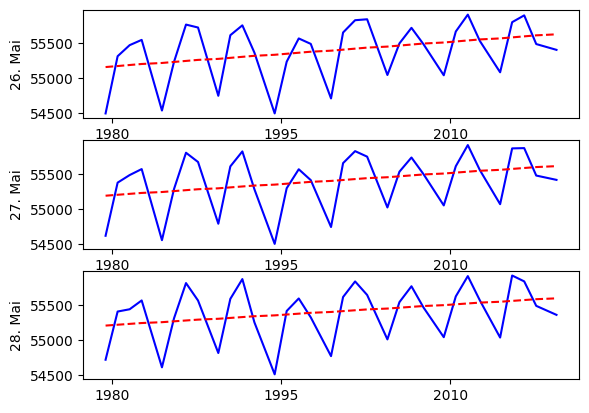

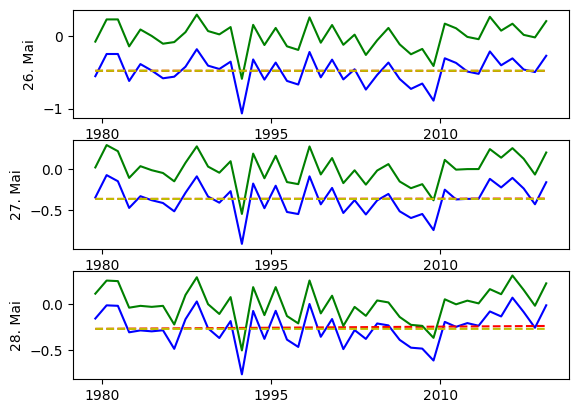

In [5]:
num = 3
for i in range(num):
    y = np.mean(zg[i::123], axis=(1,2))
    tmp_time = time[i::123]
    x = np.arange(len(y))
    coef = np.polyfit(x, y,1)
    poly1d_fn = np.poly1d(coef) 

    plt.subplot(num, 1, i+1)
    plt.ylabel(str(time[i].day) + ". Mai")
    plt.plot(tmp_time, y, 'b-')
    plt.plot(tmp_time, poly1d_fn(x), 'r--')
plt.show()

num = 3
for i in range(num):
    y = np.mean(zg_final[i::98, 0], axis=(1, 2))
    tmp_time = time_final[i::98]
    x = np.arange(len(y))
    coef = np.polyfit(x, y,1)
    poly1d_fn = np.poly1d(coef) 

    plt.subplot(num, 1, i+1)
    plt.ylabel(str(time_final[i].day) + ". Mai")
    plt.plot(tmp_time, y, 'b-')
    plt.plot(tmp_time, poly1d_fn(x), 'r--')
    plt.plot(tmp_time, (y-poly1d_fn(x)), 'g-')
    plt.plot(tmp_time, poly1d_fn((y-poly1d_fn(x))), 'y--')
plt.show()

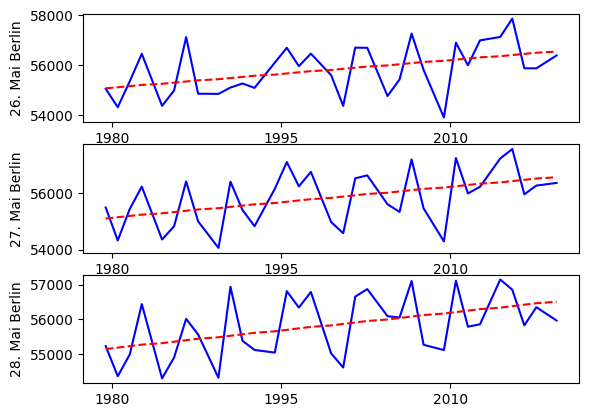

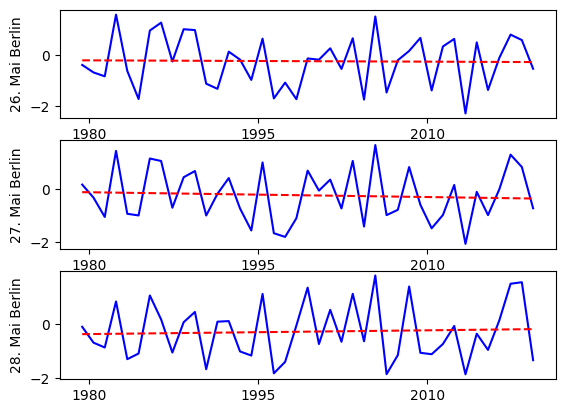

In [15]:
num = 3
for i in range(num):
    y = zg[i::123, 150, 774]
    tmp_time = time[i::123]
    x = np.arange(len(y))
    coef = np.polyfit(x, y,1)
    poly1d_fn = np.poly1d(coef) 

    plt.subplot(num, 1, i+1)
    plt.ylabel(str(time[i].day) + ". Mai Berlin")
    plt.plot(tmp_time, y, 'b-')
    plt.plot(tmp_time, poly1d_fn(x), 'r--')
plt.show()

num = 3
for i in range(num):
    y = zg_final[i::98, 0, 150, 774]
    tmp_time = time_final[i::98]
    x = np.arange(len(y))
    coef = np.polyfit(x, y,1)
    poly1d_fn = np.poly1d(coef)


    plt.subplot(num, 1, i+1)
    plt.ylabel(str(time_final[i].day) + ". Mai Berlin")
    plt.plot(tmp_time, y, 'b-')
    plt.plot(tmp_time, poly1d_fn(x), 'r--')
plt.show()

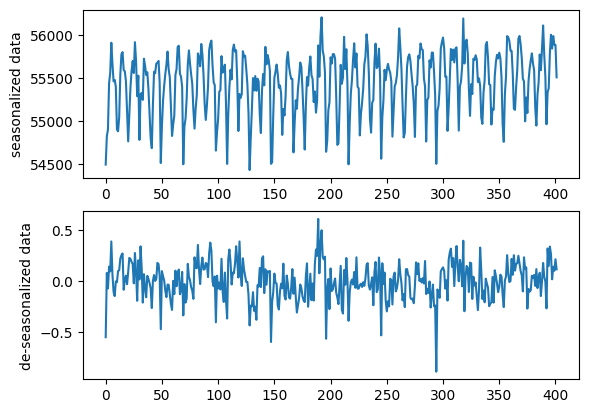

In [16]:
plt.subplot(2, 1, 1)
plt.ylabel("seasonalized data")
plt.plot(np.mean(zg[::10], axis=(1, 2)))

plt.subplot(2, 1, 2)
plt.ylabel("de-seasonalized data")
plt.plot(np.mean(zg_final[::10, 0], axis=(1, 2)))
plt.show()

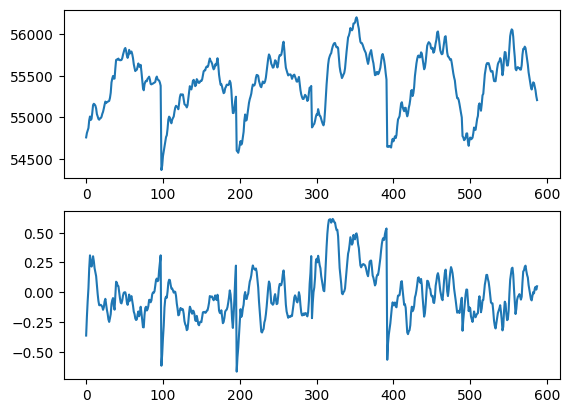

In [17]:
# year 1995-2000 compared between normal data and de-seasonalized data

year_start = datetime(year=1995, month=1, day=1)
year_end = datetime(year=2000, month=12, day=31)

date_mask = (time >= year_start) & (time <= year_end)

plt.subplot(2, 1, 1)
plt.plot(np.mean(zg[date_mask], axis=(1, 2)))

plt.subplot(2, 1, 2)
plt.plot(np.mean(zg_final[date_mask, 0], axis=(1, 2)))

plt.show()

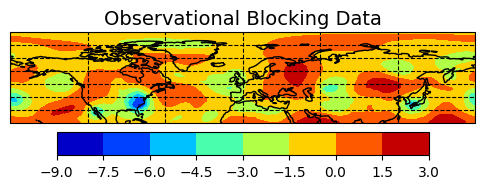

In [6]:
# plot observational data onto worldmap

fig = plt.figure(figsize=(6, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-180, 180, 20, 90], crs=ccrs.PlateCarree())
ax.coastlines(resolution="110m",linewidth=1)
ax.gridlines(linestyle='--',color='black')

plt.contourf(long[:], lat[:], zg_final[0, 0], transform=ccrs.PlateCarree(),cmap=plt.cm.jet)
plt.title('Observational Blocking Data', size=14)
cb = plt.colorbar(ax=ax, orientation="horizontal", pad=0.02, aspect=16, shrink=0.8)
cb.ax.tick_params(labelsize=10)

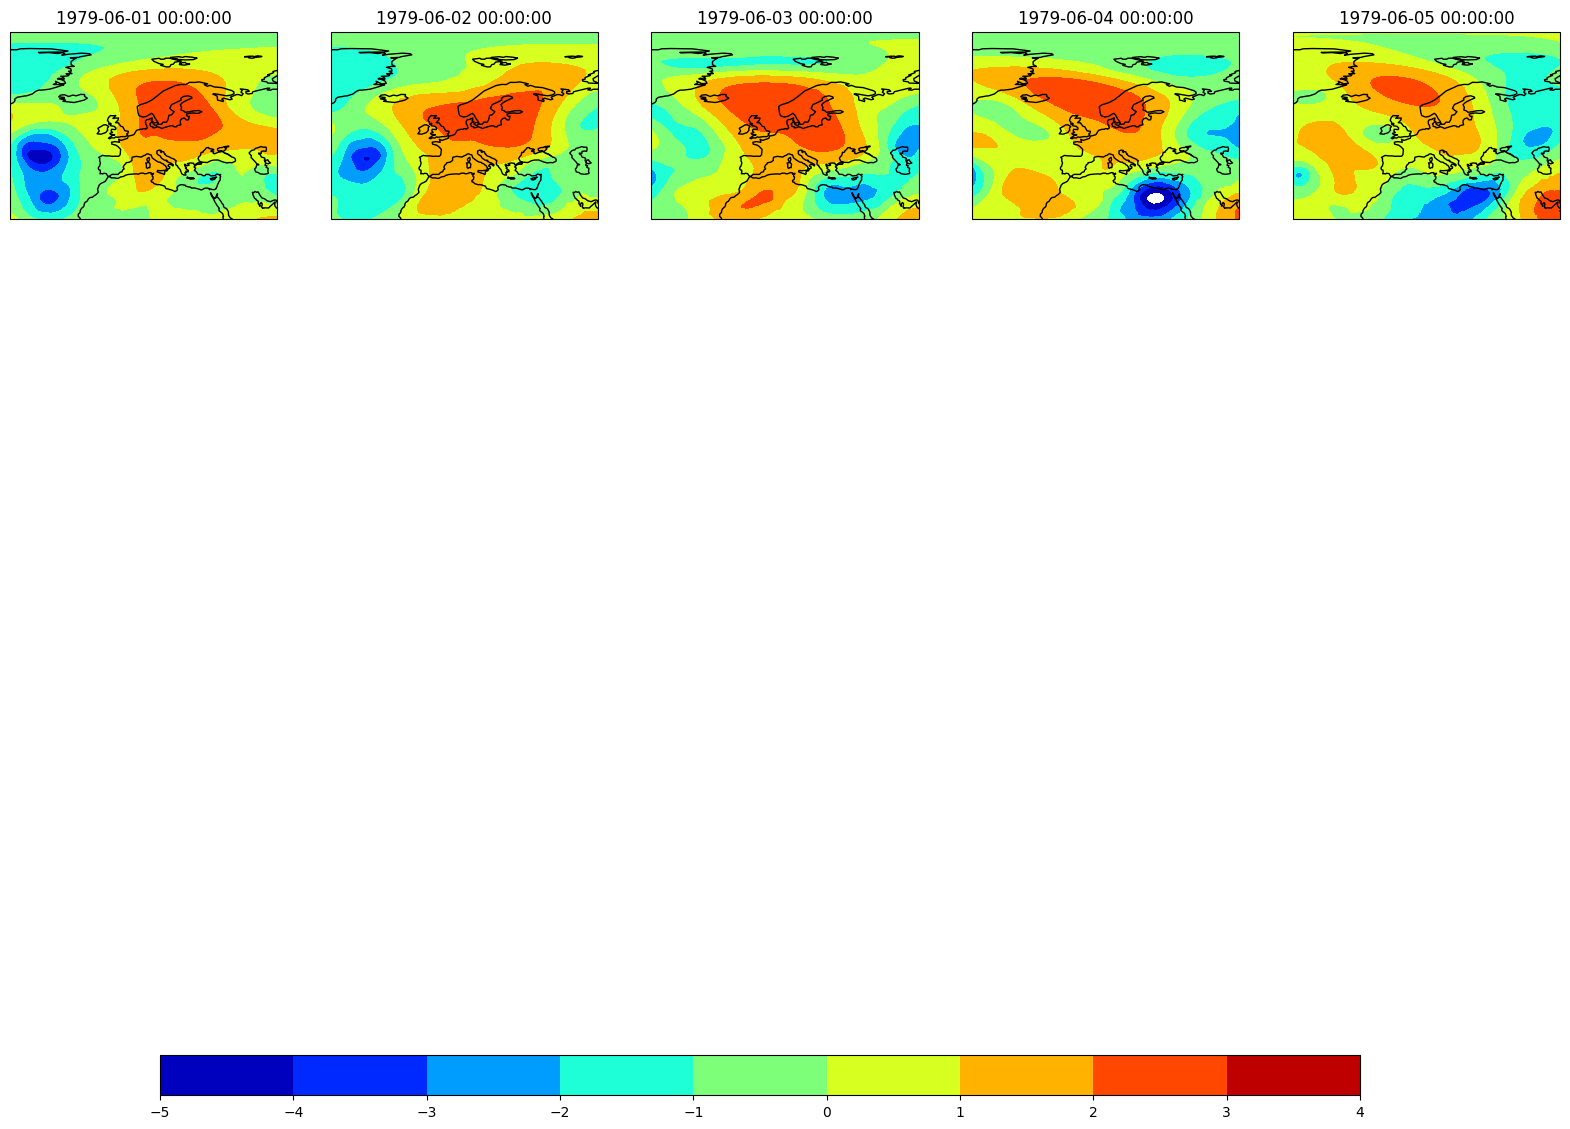

In [14]:
fig, axs = plt.subplots(nrows=1,ncols=5,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(20, 20))

axs = axs.flatten()

clevs=np.arange(-5,5,1)


for i in range(5):
    time = datetime(year=1979, month=6, day=1 + i)
    axs[i].coastlines(resolution="110m",linewidth=1)
    cs = axs[i].contourf(long[550:950], lat[:], xr_observational_final.sel(time=time, method="nearest").z_0001.to_numpy()[0, :, 550:950], clevs, transform=ccrs.PlateCarree(),cmap=plt.cm.jet)
    axs[i].set_title(str(time))


# for j in range(5):
#     axs[i*5 + j].coastlines(resolution="110m",linewidth=1)

#     cs = axs[i*5 + j].contourf(long[:], lat[:], observational_final.variables["z_0001"][idx, j], clevs, transform=ccrs.PlateCarree(),cmap=plt.cm.jet)
#     axs[i*5 + j].set_title(f_time[idx + j].strftime('%Y-%m-%d') + (" block: " + str(observational_labels.variables["blocking"][idx + j])))

cbar_ax = fig.add_axes([0.2, 0.01, 0.6, 0.02])
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal')

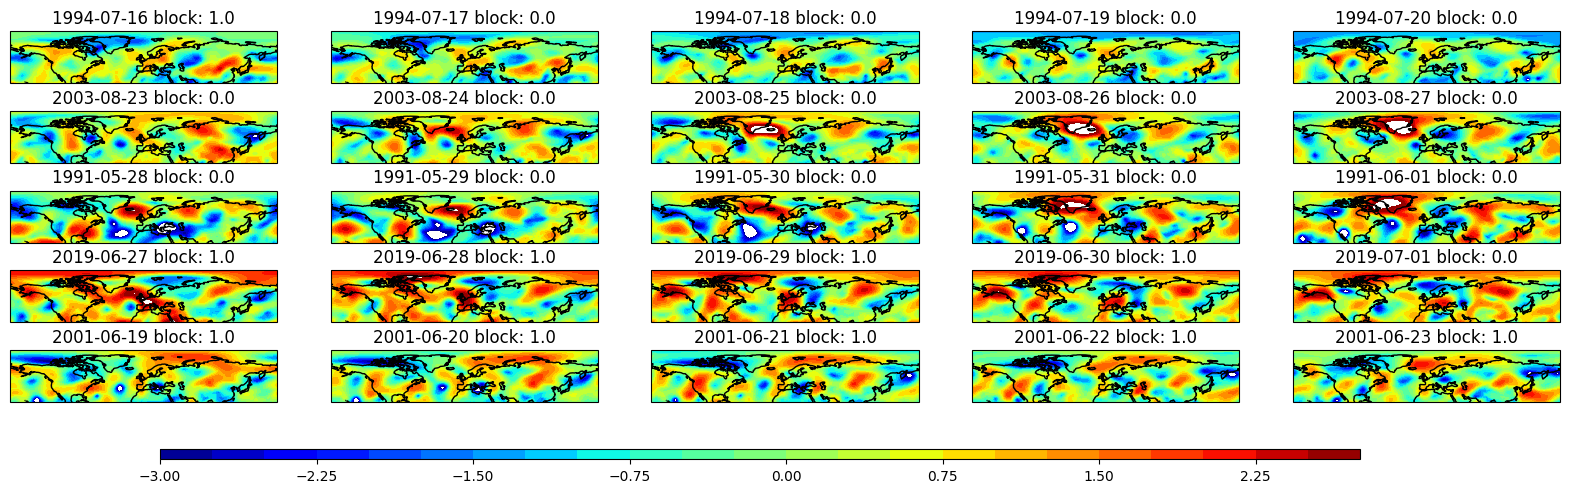

In [49]:
import random

fig, axs = plt.subplots(nrows=5,ncols=5,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(20, 5))

axs = axs.flatten()

clevs=np.arange(-3,3,0.25)

f_time = netCDF4.num2date(observational_final.variables["time"], observational_final.variables["time"].units, observational_final.variables["time"].calendar)

for i in range(5):
    idx = random.randint(0, 4017)
    for j in range(5):
        axs[i*5 + j].coastlines(resolution="110m",linewidth=1)

        cs = axs[i*5 + j].contourf(long[:], lat[:], observational_final.variables["z_0001"][idx, j], clevs, transform=ccrs.PlateCarree(),cmap=plt.cm.jet)
        axs[i*5 + j].set_title(f_time[idx + j].strftime('%Y-%m-%d') + (" block: " + str(observational_labels.variables["blocking"][idx + j])))

cbar_ax = fig.add_axes([0.2, 0.01, 0.6, 0.02])
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal')